<a href="https://colab.research.google.com/github/AceroMike/Deep-Learning/blob/main/Deep_Learning_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Data
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In this notebook we will be building Dense Neural Networks. If you are unfamiliar with neural networks, conceptually, they are not to hard to understand. Think about models layered on each other. That is, the first model provides the inputs for the second, the second to the third, and so on. This is a Sequential model which we will model here. A dense model implies that the layers are fully connected so each node/feature gives input to each other feature in the 2nd model. Here we will work with the mnist dataset which is a common dataset to practice Deep learning. This dataset contains handwritted images of integers. Therfore, we will try to predict the number. 

The first step is to load the data. 

In [3]:
# Loading and Preprocessing the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

# We will be working on a sample
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# This normalizes the data
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


The `input dimension` is the size of each picture which is 28 * 28 pixels. The `output dimension` is ten because the numbers in the data set include 0-9, or 10 number total. The `nb epoch` tells us how many times the model is going to itterate through the entire data set. 

Now we want to one hot encode our target variable. Right now, our target variable tells us the actual number. 

In [4]:
y_train[0]

5

So the first observation is a 5. Now let's one hot encode by using the `to_categorical()` function from the `keras.utils` module:

In [5]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [6]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

If you look at the array we now see a 1 in the 6th spot, which corresponds to the number 5. Don't believe me? Let's look at some visualizations before modeling the data. 

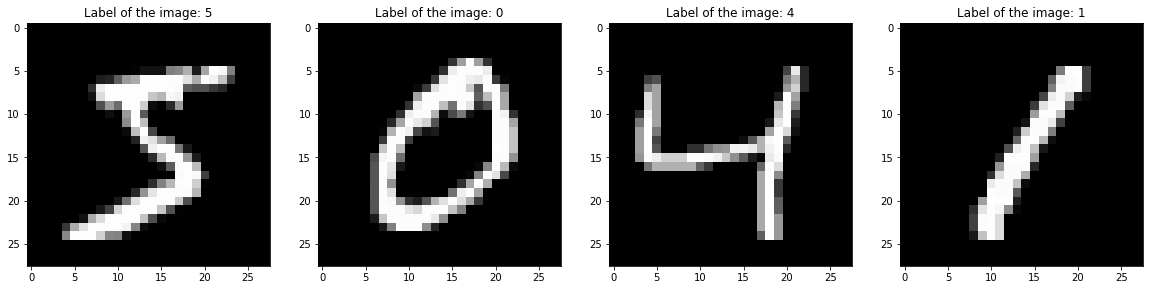

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[0]))

plt.subplot(142)
plt.imshow(X_train[1].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[1]))

plt.subplot(143)
plt.imshow(X_train[2].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[2]))

plt.subplot(144)
plt.imshow(X_train[3].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[3]))

plt.show()

Et Voila, now we can model. The first step in modeling an ANN is to decide how many layers you want the model to have as well as how many nodes each layer will have. We will look at 2 different specifications to compare the performance of each. First, we will specify the model as follows:

This ANN will consist of one hidden layer and one output layer. All of the hidden layers will be dense (In later notebooks I will look at others). The first layer and the second layer should have neuron sizes of 32 and 16, respectively.

The layers of an ANN starts with the input layer, followed by as many hidden layers as you please, and ending with the output layer. In this example the output layer will have 10 neurons to correspond to the 10 digits. 


In [13]:
# Initializing the model
model = Sequential()
#Input Layer
model.add(Dense(32, input_shape=(784,), activation='relu'))
#Hidden Layer
model.add(Dense(16, input_shape=(784,), activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))

The activation function, is the function that the model tries to minimize. Here we use the 'relu' or Rectified Linear Unit. For the output layer we use softmax. In later notebooks I will go more in depth to discuss but the purpose of this notebook is just to see ANN in action. Let's take a look at the summary of the model. 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


Our model now has 3 dense layers and is estimating a total of 25,818 parameters. Now let's compile the model. When compiling the model we have to decide 3 things: 
- What optimizer will be used in training
- What loss function will be used
- How will we measure training performance. 

We will not go in depth, yet, in the different ways. But will optimize using Stochastic Gradient Descent, our loss function will be Categorical Cross Entropy and our metric will be accuracy since we want to see how well our model predicts the number of the image. 

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


Now we can train the model using the usual `.fit()` method

In [16]:
#Fitting the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 2.1288 - accuracy: 0.2506 - val_loss: 1.2652 - val_accuracy: 0.6254
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0630 - accuracy: 0.6946 - val_loss: 0.6635 - val_accuracy: 0.8160
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.8215 - val_loss: 0.4883 - val_accuracy: 0.8637
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4754 - accuracy: 0.8673 - val_loss: 0.4085 - val_accuracy: 0.8856
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8850 - val_loss: 0.3630 - val_accuracy: 0.8983
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8972 - val_loss: 0.3380 - val_accuracy: 0.9063
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.9021 - val_loss: 0.3192 - val_accuracy: 0.9087
Epoch 

The accuracy column here tells us only how the data predicts itself, that is, the test data, the val_accuracy is the one that tells us how it does outside of the model As we can see, with each iteration, the accuracy of the model increases. Now let's look at another specification so we can compare. Now we will specify the model as follows:

This ANN should have four hidden layers and one output layer. All of the layers should be dense. The neuron numbers for the layers should be 1024, 512, 256, 128, and 64.

In [17]:
model = Sequential()
#Input Layer
model.add(Dense(1024, input_shape=(784,), activation='relu'))
#Hidden Layer 1
model.add(Dense(512, input_shape=(784,), activation='relu'))
#Hidden Layer 2
model.add(Dense(256, input_shape=(784,), activation='relu'))
#Hidden Layer 3
model.add(Dense(128, input_shape=(784,), activation='relu'))
#Hidden Layer 4
model.add(Dense(64, input_shape=(784,), activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Since we are estimating more parameters, the code will take longer to run

In [19]:
#Fitting the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 1.8538 - accuracy: 0.4697 - val_loss: 0.4665 - val_accuracy: 0.8785
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.4217 - accuracy: 0.8835 - val_loss: 0.3075 - val_accuracy: 0.9089
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.2918 - accuracy: 0.9162 - val_loss: 0.2430 - val_accuracy: 0.9302
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.2397 - accuracy: 0.9301 - val_loss: 0.2121 - val_accuracy: 0.9376
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.2092 - accuracy: 0.9393 - val_loss: 0.1914 - val_accuracy: 0.9441
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 0.1844 - accuracy: 0.9465 - val_loss: 0.1741 - val_accuracy: 0.9487
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.1699 - accuracy: 0.9500 - val_loss: 0.1880 - val_accuracy:

As we see, we quickly surpass the accuracy of the first model. This will not always be the case although, unlike shallow models (models that are not deep) We can more easily increase the number of features without worrying (as much) about overfitting because ANN models don't begin to overfit as quickly, But still we bigin to see the model overfit more with each iteration. We also see that we minimize loss the most with this model. 